In [77]:
%matplotlib inline
from fbprophet import Prophet

In [78]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [79]:
df = pd.read_csv("C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv")
df = df[['time','num_meetings','num_calls','average_meeting_minutes','num_30day_active_users','total_meeting_minutes','total_call_minutes']]

In [80]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df.set_index(df.columns[0], inplace=True)
    return df

In [81]:
def plot(df,df0):
    df1 = df.copy()
    df2 = df0.copy()
    df1 = time_set(df1)
    df2 = time_set(df2)
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

In [82]:

def timeprediction123(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='100 days', horizon = '100 days')
    
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [83]:
def timepredictionMAPE(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='100 days', horizon = '100 days')
    try:
        print("MAPE for " + csvfilename + " predictions")
        fig = plot_cross_validation_metric(df_cv, metric='mape')
    except:
        print("MAPE way too low to be graphed, prediction is very good")
    df2 = time_pred[['yhat']]
    return df1,df2,time_pred

In [84]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

In [85]:
def send_predictionMAPE(df):
    df_with_all_preds = timepredictionMAPE(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timepredictionMAPE(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_meetings
  horizon         mse       rmse        mae  coverage
0  9 days   75.160449   8.669513   7.382064  0.222222
1 10 days   83.455918   9.135421   8.007569  0.166667
2 11 days  106.668923  10.328065   9.156792  0.111111
3 12 days  127.973502  11.312537   9.960703  0.111111
4 13 days  147.462975  12.143433  10.883868  0.111111
Performance tail for num_meetings
    horizon         mse       rmse        mae  coverage
87  96 days  287.698693  16.961683  13.850073  0.333333
88  97 days  271.732346  16.484306  13.443861  0.333333
89  98 days  258.575118  16.080271  13.494696  0.277778
90  99 days  234.069362  15.299326  12.754122  0.333333
91 100 days  188.009585  13.711659  11.348041  0.388889


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_calls
  horizon          mse       rmse        mae  coverage
0  9 days  1372.139206  37.042397  32.679905  0.222222
1 10 days  1748.414711  41.814049  38.186360  0.111111
2 11 days  2460.747117  49.605918  43.630318  0.111111
3 12 days  2646.092599  51.440185  45.618479  0.111111
4 13 days  3245.167688  56.966373  50.534426  0.111111
Performance tail for num_calls
    horizon         mse       rmse        mae  coverage
87  96 days  654.990967  25.592791  22.319469  0.444444
88  97 days  643.972120  25.376606  22.113980  0.500000
89  98 days  657.100367  25.633969  22.802162  0.500000
90  99 days  608.765415  24.673172  22.042360  0.500000
91 100 days  493.087298  22.205569  19.458886  0.555556


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for average_meeting_minutes
  horizon          mse       rmse        mae  coverage
0  9 days  3321.857636  57.635559  44.704764  0.222222
1 10 days  4176.237932  64.623819  53.214418  0.111111
2 11 days  5467.950022  73.945588  61.571029  0.055556
3 12 days  6851.073447  82.771211  69.533028  0.027778
4 13 days  8692.746317  93.234899  79.797725  0.000000
Performance tail for average_meeting_minutes
    horizon           mse        rmse        mae  coverage
87  96 days   9032.794505   95.041015  90.181689  0.055556
88  97 days   9117.242592   95.484253  90.352796  0.055556
89  98 days   9171.095863   95.765839  89.748773  0.055556
90  99 days   9388.100017   96.892208  89.234027  0.055556
91 100 days  10298.519249  101.481620  90.423060  0.111111


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_30day_active_users
  horizon           mse        rmse         mae  coverage
0  9 days  12382.134796  111.275041   80.258975  0.055556
1 10 days  20001.361557  141.426170  104.513774  0.000000
2 11 days  31294.430033  176.902318  132.827376  0.000000
3 12 days  46607.872388  215.888565  160.156414  0.000000
4 13 days  71379.778001  267.169942  200.757653  0.000000
Performance tail for num_30day_active_users
    horizon           mse         rmse          mae  coverage
87  96 days  7.497469e+06  2738.150578  2189.489246       0.0
88  97 days  7.320018e+06  2705.553250  2164.114074       0.0
89  98 days  7.145129e+06  2673.037408  2139.805157       0.0
90  99 days  6.979381e+06  2641.851872  2115.494335       0.0
91 100 days  6.817150e+06  2610.967315  2090.666464       0.0


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for total_meeting_minutes
  horizon           mse         rmse          mae  coverage
0  9 days  7.106075e+05   842.975359   646.264167  0.166667
1 10 days  1.038536e+06  1019.085940   772.583023  0.111111
2 11 days  1.509281e+06  1228.528113   921.574433  0.111111
3 12 days  1.520478e+06  1233.076633   934.961303  0.111111
4 13 days  2.182981e+06  1477.491479  1100.429497  0.111111
Performance tail for total_meeting_minutes
    horizon            mse        rmse         mae  coverage
87  96 days  902554.529386  950.028699  697.186528  0.222222
88  97 days  644894.235966  803.053072  594.542140  0.277778
89  98 days  451267.354279  671.764359  493.993354  0.333333
90  99 days  320330.410453  565.977394  412.978336  0.333333
91 100 days  217470.423986  466.337243  335.559413  0.388889


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


Performance head for total_call_minutes
  horizon           mse         rmse          mae  coverage
0  9 days  1.449948e+07  3807.817978  2831.088491  0.277778
1 10 days  1.992160e+07  4463.362519  3164.997131  0.277778
2 11 days  2.734315e+07  5229.067653  3674.750161  0.333333
3 12 days  2.720180e+07  5215.534806  3640.412930  0.361111
4 13 days  3.909285e+07  6252.427483  4287.500935  0.361111
Performance tail for total_call_minutes
    horizon           mse         rmse          mae  coverage
87  96 days  3.923779e+07  6264.007631  4619.737399  0.222222
88  97 days  2.923926e+07  5407.333714  4042.956591  0.166667
89  98 days  2.121910e+07  4606.419779  3385.850020  0.222222
90  99 days  1.425560e+07  3775.659344  2657.066098  0.333333
91 100 days  1.006042e+07  3171.816636  2305.903193  0.388889


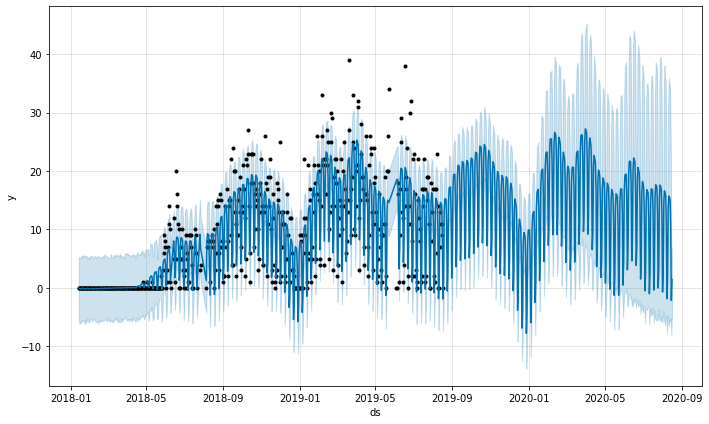

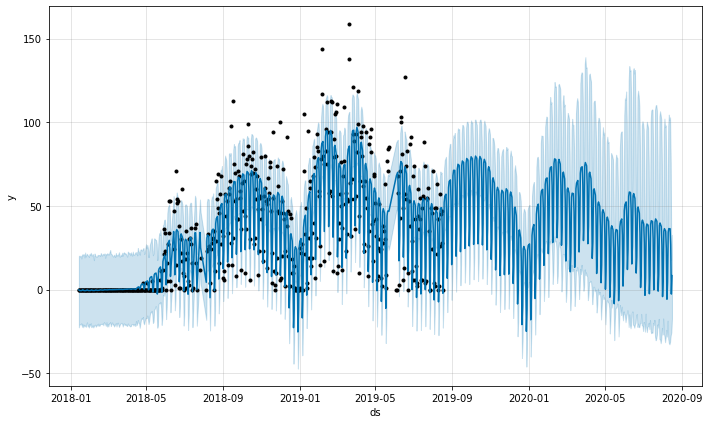

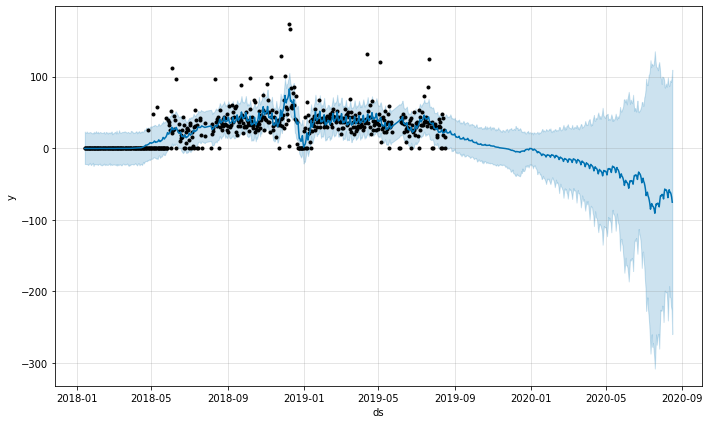

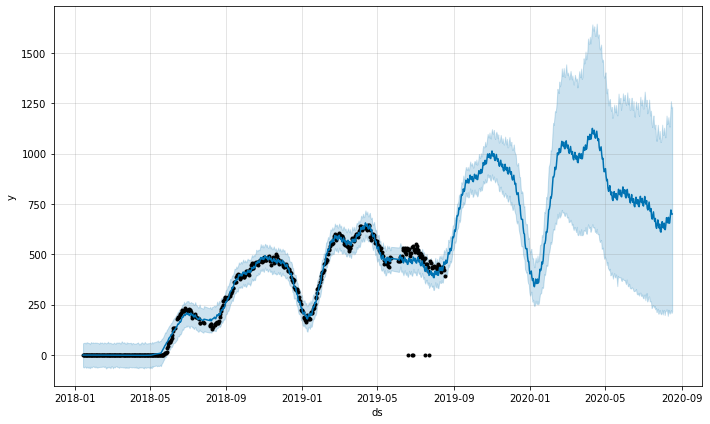

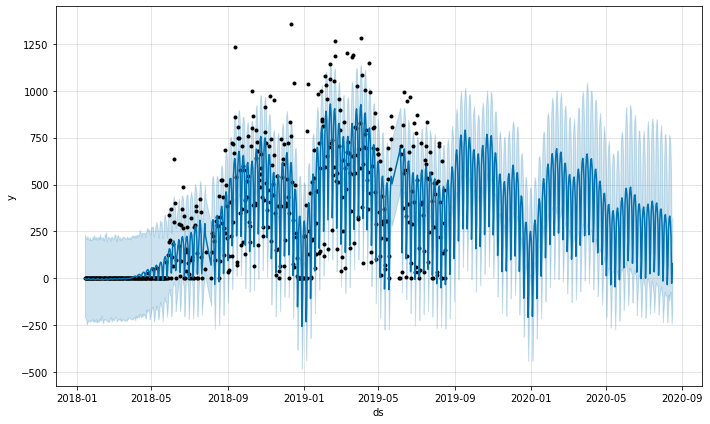

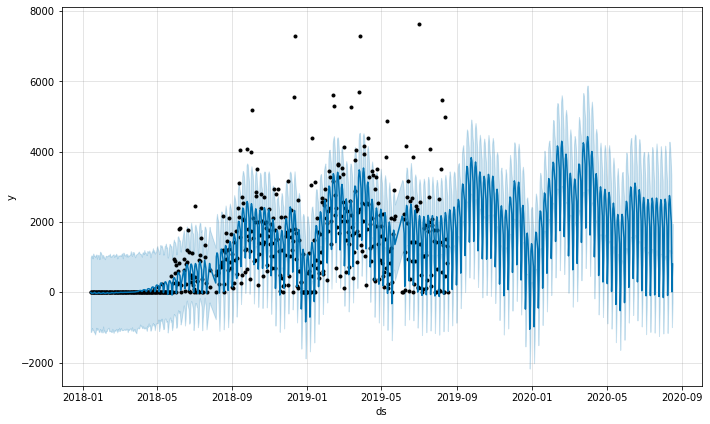

In [86]:
prediction = send_prediction(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_meetings predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_calls predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for average_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_30day_active_users predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for total_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-01-29 00:00:00 and 2019-05-09 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


MAPE for total_call_minutes predictions
MAPE way too low to be graphed, prediction is very good


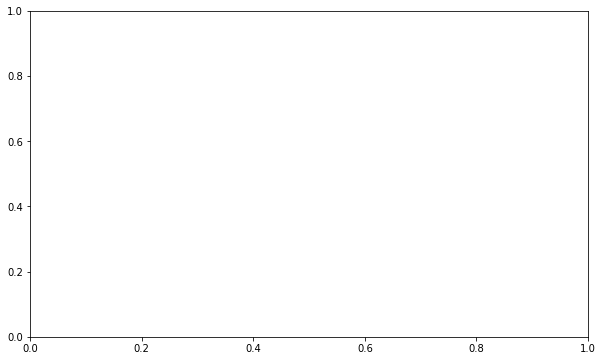

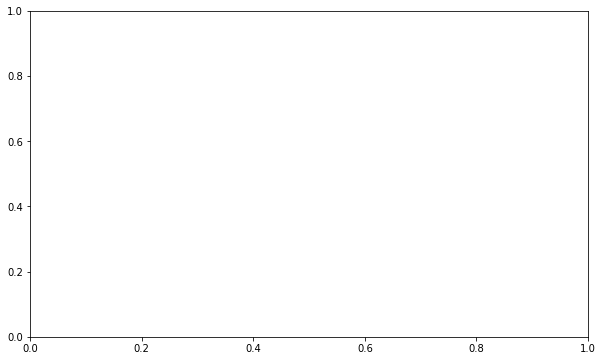

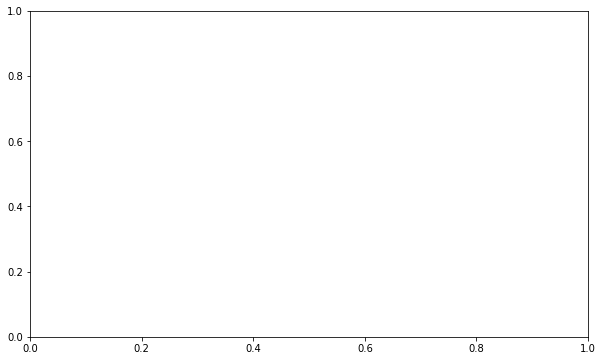

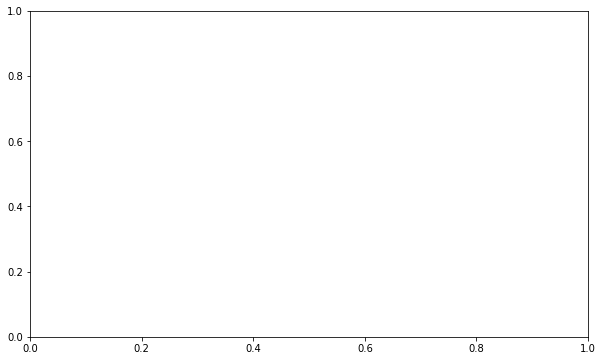

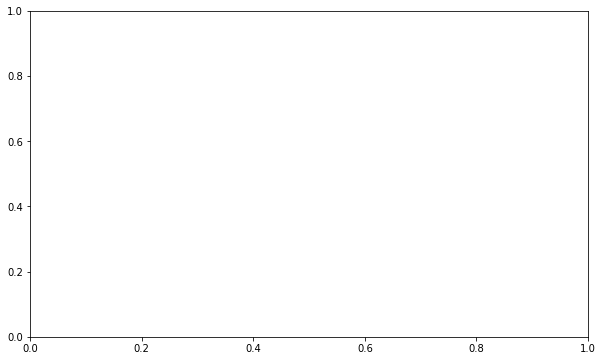

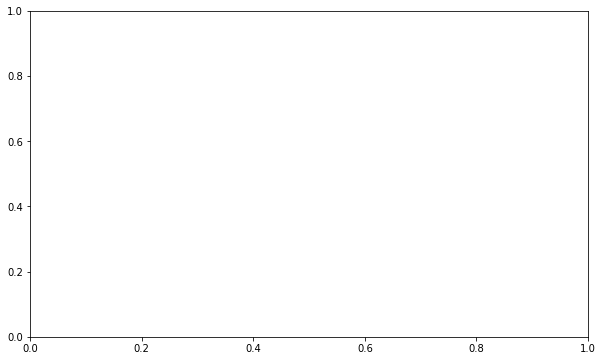

In [87]:
prediction1 = send_predictionMAPE(df)

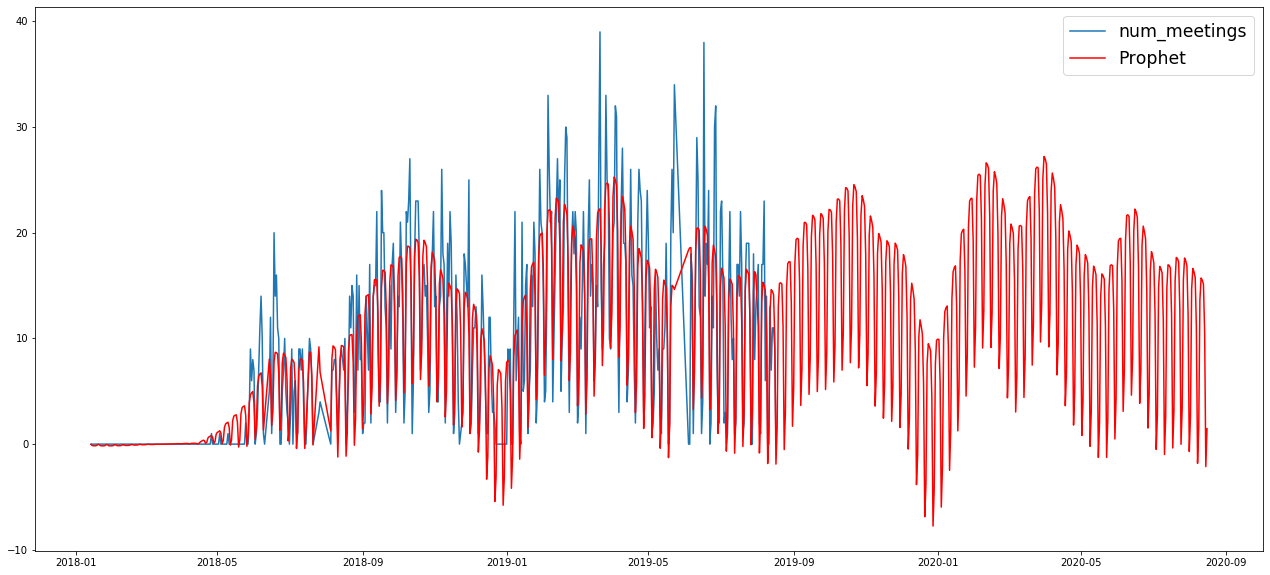

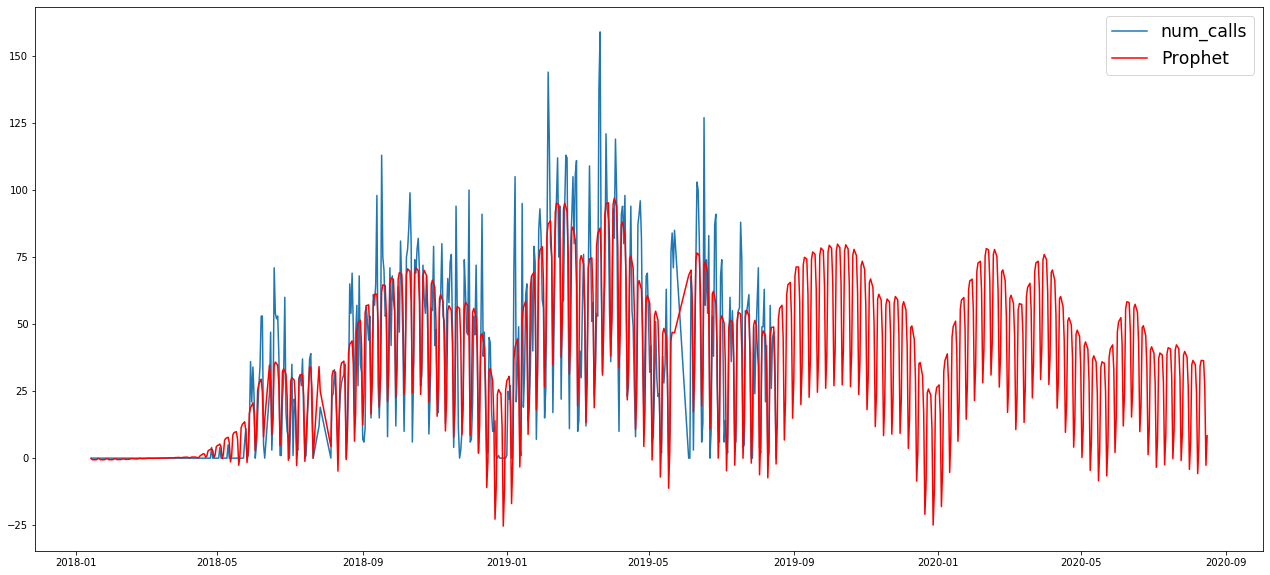

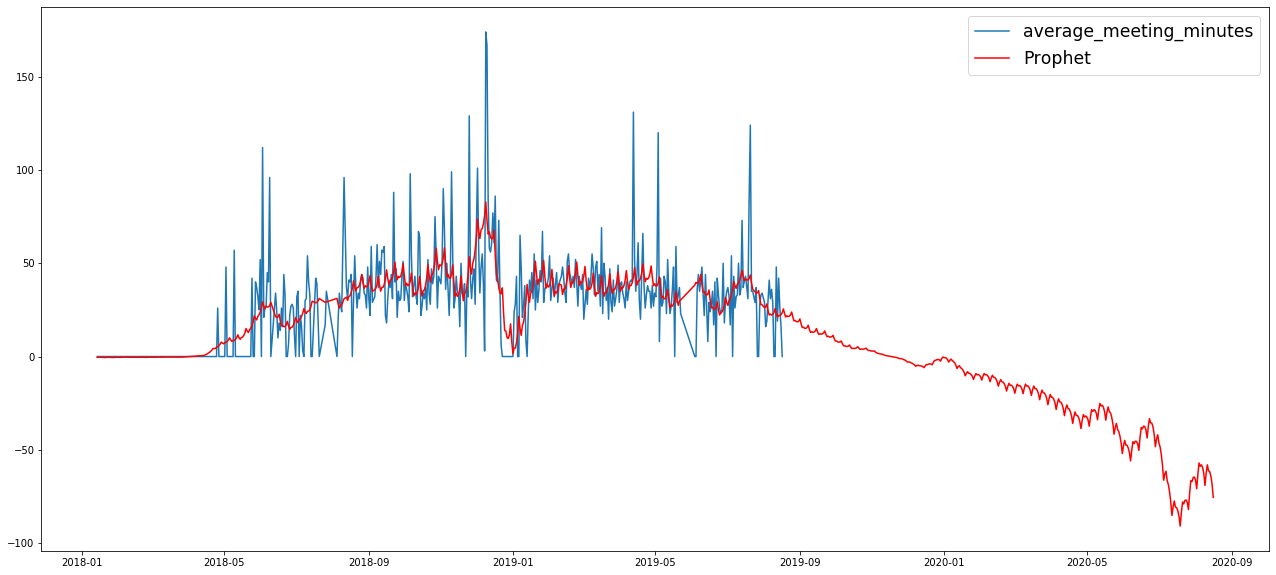

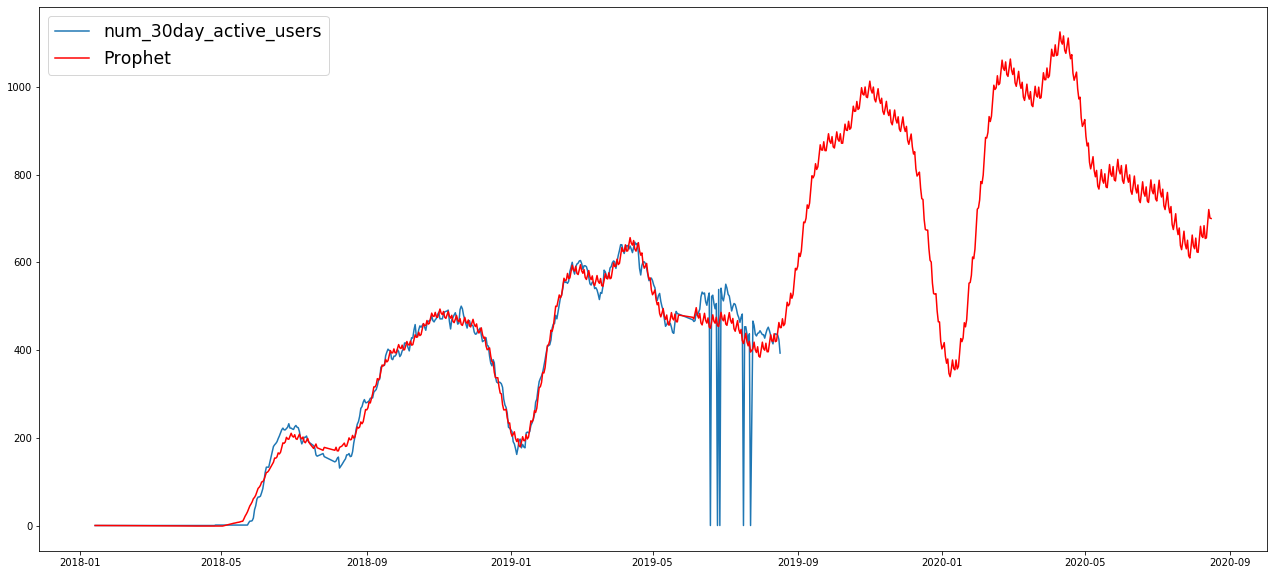

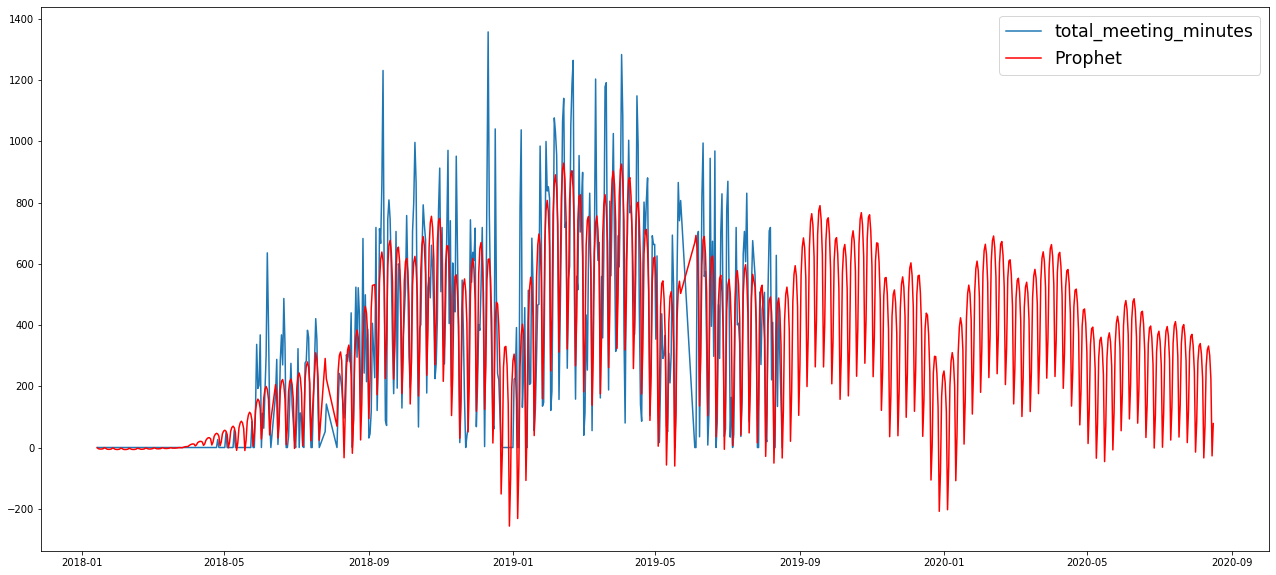

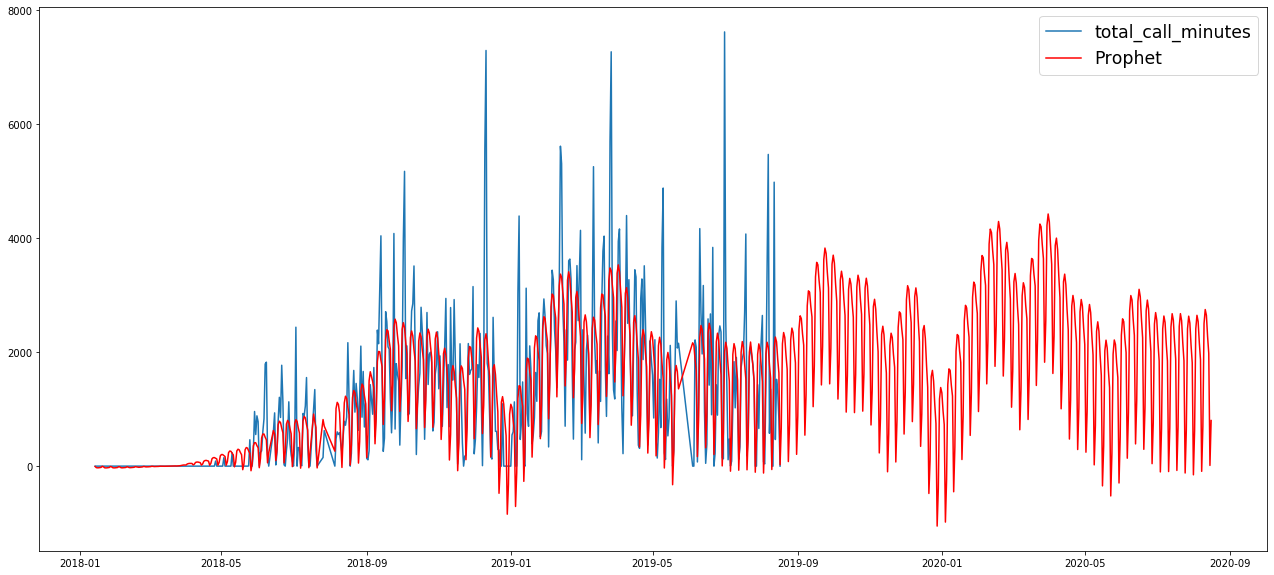

In [88]:
plot(df,prediction)

In [89]:
prediction

,time,num_meetings,num_calls,average_meeting_minutes,num_30day_active_users,total_meeting_minutes,total_call_minutes
0,2018-01-14,-0.025304,-0.153538,-0.441278,0.044158,-0.938549,-6.608366
1,2018-01-15,-0.134701,-0.572179,-0.375668,0.041140,-3.936101,-26.715849
2,2018-01-16,-0.155230,-0.605944,-0.333467,0.033506,-4.872329,-29.617592
3,2018-01-17,-0.155817,-0.604781,-0.379767,0.028241,-5.182597,-28.755032
4,2018-01-18,-0.154557,-0.602611,-0.388212,0.024092,-4.879375,-25.122153
5,2018-01-19,-0.119502,-0.474497,-0.417257,0.019026,-3.939181,-22.303411
6,2018-01-20,-0.020486,-0.101333,-0.462971,0.011762,-0.543918,-3.080298
7,2018-01-21,-0.051175,-0.237621,-0.538723,0.004781,-2.108839,-11.183223
8,2018-01-22,-0.147193,-0.597408,-0.457738,-0.002693,-4.921738,-28.670552
9,2018-01-23,-0.164058,-0.619179,-0.398828,-0.010391,-5.765094,-30.880719
